# Understanding Descriptive Statistics

Import the necessary libraries here:

In [127]:
# Libraries

import pandas as pd
import numpy as np
import random
import matplotlib
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [11]:
# your code here
def roll_dice():
    df = pd.DataFrame(columns=["roll"], index=(range(1,11)))
    for i in range(1,11):
        df.loc[i] = random.choices(range(1,7))
    return df


# solution
# def dice_roll(n=10):
#     return pd.DataFrame([randint(1,6) for i in range(n)],columns=['value'])

# rolls = dice_roll()

#### 2.- Plot the results sorted by value.

In [30]:
# your code here
df_roll = roll_dice()


In [120]:
df_roll.sort_values("roll")

,roll
2,1
7,1
10,1
4,2
6,2
8,2
3,3
9,4
1,5
5,5


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [125]:
# your code here
#df_roll["roll"].value_counts()
frequency = pd.DataFrame(df_roll["roll"].value_counts(sort=False))
frequency


## solution

# def own_freq_dis(l):
#     return l['value'].value_counts(sort=False)
# print(own_freq_dis(rolls))
# rolls.hist()

,roll
1,3
2,3
3,1
4,1
5,2


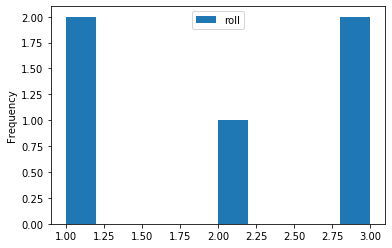

In [126]:
frequency.plot(kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196C2064188>]],
      dtype=object)

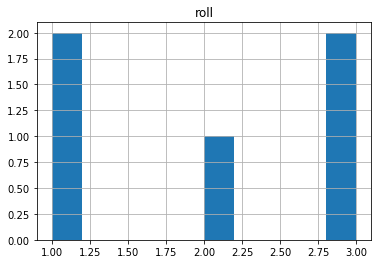

In [128]:
frequency.hist()

In [ ]:
"""
In the frequency distribution plot you can easily visualize which rolls were more frequent (1 and 3)
In the original plot it is not so clear.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [46]:
# your code here

def mean_rolls(df):
    values_sum = 0
    for i in df.index:
        values_sum += df.loc[i]
    average = values_sum/len(df)
    return average



# ## solution
# def own_mean(l):
#     return sum(l.values)/len(l)

# print(own_mean(rolls))

In [47]:
mean_rolls(df_roll)

roll    2.6
Name: 1, dtype: object

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [49]:
# your code here
mean_rolls(frequency)

roll    2.0
Name: 2, dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [132]:
# your code here

def median_func(df):
    df = df.sort_values("roll")

    if len(df)%2 == 0:
        med_loc = int(len(test) / 2)
        med_1 = df.iloc[med_loc-1]
        med_2 = df.iloc[med_loc]
        median = (med_1 + med_2)/2
    else:
        med_loc = int(len(test//2))
        median = df.iloc[med_loc]
    return median


def own_median(l):
    sorted_list = sorted(l.values)
    list_len = len(l)
    index = (list_len - 1) // 2
    if (list_len % 2):
        result = sorted_list[index]
    else:
        result = (sorted_list[index] + sorted_list[index + 1])/2
    return result[0]


In [133]:
own_median(df_roll)

2.0

In [87]:
median_func(df_roll)

roll    2
dtype: object

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [145]:
# your code here
import math

def own_quartiles(l):
    percentiles = [25,50,75,100]
    sorted_list = sorted(l.values)
    for p in percentiles:        
        k = (len(sorted_list)-1) * p/100
        f = math.floor(k)
        c = math.ceil(k)
        if f == c:
            print((p, sorted_list[int(k)][0]))
        else:
            print((p,((sorted_list[(f)]) + (sorted_list[(c)]))[0]/2))

own_quartiles(df_roll)

(25, 1.5)
(50, 2.0)
(75, 3.5)
(100, 5)


In [158]:
sorted_lst = sorted(df_roll.values)
sorted_lst[2]+sorted_lst[3]

array([3], dtype=object)

In [159]:
sorted_lst

[array([1], dtype=object),
 array([1], dtype=object),
 array([1], dtype=object),
 array([2], dtype=object),
 array([2], dtype=object),
 array([2], dtype=object),
 array([3], dtype=object),
 array([4], dtype=object),
 array([5], dtype=object),
 array([5], dtype=object)]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [79]:
# your code here

roll_the_dice = pd.read_csv("C:/Users/Admin/Documents/ironhack/data-ber-03-20/Labs/module-2_labs/01_statistics/statistics_extras/Descriptive-Stats/data/roll_the_dice_hundred.csv")

In [82]:
roll_the_dice.sort_values("value").head(50)

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
63,63,63,1
26,26,26,1
89,89,89,1
3,3,3,1
94,94,94,1


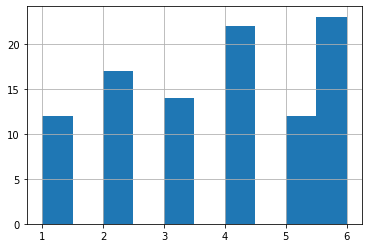

In [161]:
roll_the_dice["value"].hist()

In [ ]:
"""
the values seem to have the same frequency
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [83]:
# your code here

mean_rolls(roll_the_dice)

Unnamed: 0    49.50
roll          49.50
value          3.74
Name: 0, dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [93]:
# your code here

roll_the_dice["value"].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

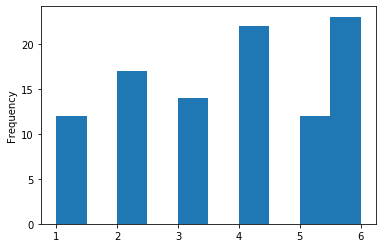

In [94]:
# your code here

roll_the_dice["value"].plot(kind="hist")

In [ ]:
"""
values 4 and 6 were more likely to happen (higher probability), they occurred more often
"""

"""
The shape resembles the shape of the 10 rolls which is somewhat a Symmetrical shape. 
The mean value will be closer to 4
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [95]:
# your code here

roll_1000 = pd.read_csv("C:/Users/Admin/Documents/ironhack/data-ber-03-20/Labs/module-2_labs/01_statistics/statistics_extras/Descriptive-Stats/data/roll_the_dice_thousand.csv")

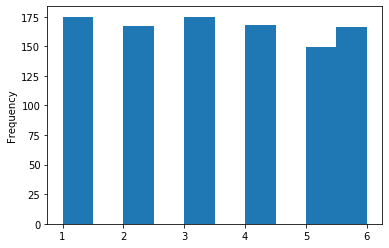

In [96]:
roll_1000["value"].plot(kind="hist")

In [ ]:
"""
the probability of each outcome are similar, each outcome is getting to be 1/6


"""
"""
The data distribution is more or less the same, but with less diference between occurences.
the shape is getting more and more symetrical with the increase of rolls.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [97]:
# your code here

ages = pd.read_csv("C:/Users/Admin/Documents/ironhack/data-ber-03-20/Labs/module-2_labs/01_statistics/statistics_extras/Descriptive-Stats/data/ages_population.csv")
ages 

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [99]:
ages["observation"].value_counts()

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64

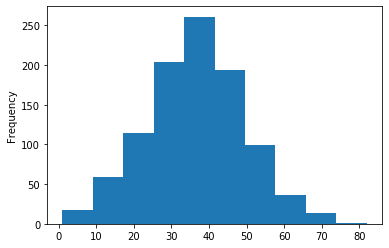

In [100]:
ages["observation"].plot(kind="hist")

In [ ]:
"""
mean will be between 30 and 40
std will be around 10
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [101]:
# your code here

ages.mean()

observation    36.56
dtype: float64

In [102]:
ages.std()

observation    12.8165
dtype: float64

In [103]:
"""
yes
"""

"""
The mean yes, the standard deviation not so much. But it is a close value. 
Graphical visualization helps a lot in the initial analysis
"""

'\nyes\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [104]:
# your code here
ages_2 = pd.read_csv("C:/Users/Admin/Documents/ironhack/data-ber-03-20/Labs/module-2_labs/01_statistics/statistics_extras/Descriptive-Stats/data/ages_population2.csv")
ages_2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [105]:
ages_2["observation"].value_counts()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

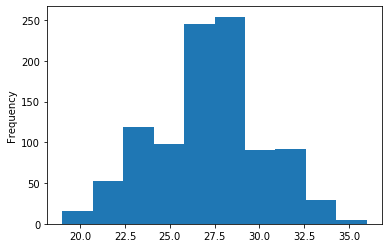

In [106]:
ages_2["observation"].plot(kind="hist")

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [107]:
"""
yes, the first step had a normal distribution, this distribution is not as symmetrical
"""

"""
Yes. The range is quite shorter. But the type of distribution seems to be more or less the same, unimodal.
"""

'\nyes, the first step had a normal distribution, this distribution is not as symmetrical\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [109]:
# your code here
ages_2.mean()


observation    27.155
dtype: float64

In [110]:
ages_2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
there is less deviation, meaning that the values are more close to each other
"""


"""
Both values are much smaller. Especially the standard deviation.
It seems that this study (ages2 dataset) is much more specific than the first one (ages dataset).
Also because the range of data is quite less.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [111]:
# your code here

ages_3 = pd.read_csv("C:/Users/Admin/Documents/ironhack/data-ber-03-20/Labs/module-2_labs/01_statistics/statistics_extras/Descriptive-Stats/data/ages_population3.csv")
ages_3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [115]:
ages_3["observation"].value_counts()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

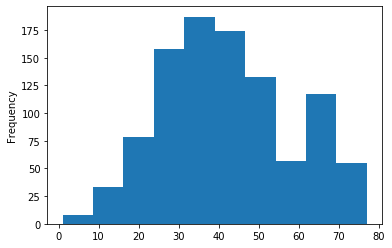

In [117]:
ages_3["observation"].plot(kind="hist")

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [118]:
# your code here
ages_3.mean()

observation    41.989
dtype: float64

In [119]:
ages_3.std()

observation    16.144706
dtype: float64

In [ ]:
"""
the values are more skewed to the left, menaning that the mean is increased (there are more higher values)
and the std increased as well because there are values that are further away from the mean
"""

"""
your comments here
Both Average and standard deviation increased making the histogram a bit more skewed to the left. 
Altough the range is the same as is the first dataset. This neighborhood has more older people.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [114]:
# your code here
ages_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
not much, just 1.98, around 2 years
"""

"""
Compared to other neighbourhoods this one has indeed "older" people than other neighbourhoods. 
50% of the populations is more that 40years old.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [162]:
# your code here

# your code here
print(ages_3['observation'].quantile([0.1,0.5,0.9]))

0.1    22.0
0.5    40.0
0.9    67.0
Name: observation, dtype: float64


In [ ]:
"""
I think this percentiles will help the analysis. 
A lot of "outliers" are removed with these intervals
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [163]:
# your code here

ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [164]:
ages_2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [165]:
ages_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
From the 3 neighbourhoods we can easilly state that:
Neighbourhood 1 is probably a young family neighbourhood. We have a minimun age of 1, and 50% of the population is under the 40years old.
Neighbourhood 2 is probably a student neighbourhood, since the minimum age is 19 Years old and Max 36, which means that the Neighbourhood is quite young
Neighbourhood 3 is also a family neighbouhood, but with a few more older people with a increase in the 60-70 years old population.
"""